In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [74]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, OrdinalEncoder,
    PowerTransformer, QuantileTransformer
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV,
    validation_curve, learning_curve
)


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier,
    VotingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    SGDRegressor, BayesianRidge, HuberRegressor
)
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.feature_selection import (
    SelectKBest, SelectFromModel, RFE, RFECV,
    chi2, f_classif, f_regression, mutual_info_classif
)


from sklearn.metrics import (
    # Clasificación
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc, log_loss,
    
    # Regresión
    mean_squared_error, mean_absolute_error, r2_score,
    mean_squared_log_error, mean_absolute_percentage_error, make_scorer,
    
    # Clustering
    silhouette_score, adjusted_rand_score, calinski_harabasz_score
)

try:
    import xgboost as xgb
    print("✅ XGBoost disponible")
except ImportError:
    print("❌ XGBoost no instalado")

try:
    import lightgbm as lgb
    print("✅ LightGBM disponible")
except ImportError:
    print("❌ LightGBM no instalado")

try:
    from catboost import CatBoostClassifier, CatBoostRegressor
    print("✅ CatBoost disponible")
except ImportError:
    print("❌ CatBoost no instalado")


try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    print("✅ TensorFlow disponible")
except ImportError:
    print("❌ TensorFlow no instalado")

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    print("✅ PyTorch disponible")
except ImportError:
    print("❌ PyTorch no instalado")


try:
    import spacy
    print("✅ SpaCy disponible")
except ImportError:
    print("❌ SpaCy no instalado")


try:
    import scipy.stats as stats
    from scipy import stats
    print("✅ SciPy disponible")
except ImportError:
    print("❌ SciPy no instalado")
from scipy.stats import uniform, randint

try:
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("✅ Statsmodels disponible")
except ImportError:
    print("❌ Statsmodels no instalado")


try:
    from prophet import Prophet
    print("✅ Prophet disponible")
except ImportError:
    print("❌ Prophet no instalado")


try:
    import optuna
    print("✅ Optuna disponible")
except ImportError:
    print("❌ Optuna no instalado")


import os
import sys
import json
import pickle
import joblib
from datetime import datetime, timedelta
import itertools
from collections import Counter
import gc


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.width', None)


plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


sns.set_palette("husl")
sns.set_style("whitegrid")


np.random.seed(1722)


def info_basica(df):
    """Función para explorar un dataset rápidamente"""
    print("=" * 50)
    print("INFORMACIÓN BÁSICA DEL DATASET")
    print("=" * 50)
    print(f"Forma del dataset: {df.shape}")
    print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nTipos de datos:")
    print(df.dtypes.value_counts())
    print("\nValores nulos:")
    print(df.isnull().sum().sort_values(ascending=False))
    print("\nValores duplicados:", df.duplicated().sum())
    print("\nPrimeras 5 filas:")
    print(df.head())



✅ XGBoost disponible
✅ LightGBM disponible
✅ CatBoost disponible
✅ TensorFlow disponible
✅ PyTorch disponible
✅ SpaCy disponible
✅ SciPy disponible
✅ Statsmodels disponible
✅ Prophet disponible
✅ Optuna disponible


In [75]:
train           = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
test            = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
holidays_events = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
oil             = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
stores          = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
transactions    = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [76]:

# VERIFICAR COLUMNAS PARA EVITAR CONFLICTOS
print(f"\nColumnas en stores: {list(stores.columns)}")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")

# Verificar si hay conflicto de nombres
stores_cols = set(stores.columns)
holidays_cols = set(holidays_events.columns)
conflicting_cols = stores_cols.intersection(holidays_cols) - {'date'}  # Excluir 'date' que es normal
if conflicting_cols:
    print(f"⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {conflicting_cols}")

# 2. Preparar fechas - convertir a datetime
print("\nPreparando fechas...")
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

# 3. Manejar valores faltantes en precio del petróleo
print(f"\nValores faltantes en oil antes: {oil['dcoilwtico'].isna().sum()}")

# Ordenar por fecha y usar forward fill (último valor válido)
oil = oil.sort_values('date')
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')

# Si aún quedan NaN al inicio, usar backward fill
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')

print(f"Valores faltantes en oil después: {oil['dcoilwtico'].isna().sum()}")

# 4. Preparar holidays_events para join
print("\nPreparando holidays_events...")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")
print(f"Fechas en holidays: {holidays_events['date'].min()} a {holidays_events['date'].max()}")
print(f"Fechas en train: {train['date'].min()} a {train['date'].max()}")

# Verificar si hay overlap de fechas
overlap = holidays_events[holidays_events['date'].between(train['date'].min(), train['date'].max())]
print(f"Eventos que coinciden con período de train: {len(overlap)}")

if len(holidays_events) > 0:
    # RENOMBRAR LA COLUMNA TYPE DE HOLIDAYS PARA EVITAR CONFLICTO
    holidays_renamed = holidays_events.copy()
    if 'type' in holidays_renamed.columns:
        holidays_renamed = holidays_renamed.rename(columns={'type': 'type_holiday'})
        print("✓ Renombrado 'type' a 'type_holiday' en holidays")
    
    # Puede haber múltiples eventos por día, así que agrupamos
    agg_dict = {}
    for col in holidays_renamed.columns:
        if col != 'date':
            if col in ['type_holiday', 'locale', 'locale_name', 'description']:
                agg_dict[col] = lambda x: ', '.join(x.unique())
            elif col == 'transferred':
                agg_dict[col] = 'any'
    
    holidays_agg = holidays_renamed.groupby('date').agg(agg_dict).reset_index()
    
    # Crear variable binaria para indicar si hay feriado/evento
    holidays_agg['has_holiday'] = True
    print(f"Días únicos con eventos: {len(holidays_agg)}")
else:
    # Si no hay datos de holidays, crear dataframe vacío con estructura correcta
    holidays_agg = pd.DataFrame(columns=['date', 'type_holiday', 'locale', 'locale_name', 'description', 'transferred', 'has_holiday'])
    print("No hay datos de holidays - creando estructura vacía")

# 5. Comenzar consolidación desde train
print("\nConsolidando datasets...")
df_consolidated = train.copy()

# 6. Join con stores (por store_nbr) - renombrar type a type_store
stores_renamed = stores.rename(columns={'type': 'type_store'})
df_consolidated = df_consolidated.merge(
    stores_renamed, 
    on='store_nbr', 
    how='left'
)
print(f"Después de join con stores: {df_consolidated.shape}")

# 7. Join con oil (por date)
df_consolidated = df_consolidated.merge(
    oil, 
    on='date', 
    how='left'
)
print(f"Después de join con oil: {df_consolidated.shape}")

# 8. Join con holidays (por date) - left join para mantener todos los días
if len(holidays_agg) > 0:
    df_consolidated = df_consolidated.merge(
        holidays_agg, 
        on='date', 
        how='left'
    )
    print(f"Después de join con holidays: {df_consolidated.shape}")
else:
    # Si no hay holidays, crear las columnas manualmente
    df_consolidated['type_holiday'] = 'No Event'
    df_consolidated['locale'] = 'No Event'
    df_consolidated['locale_name'] = 'No Event'
    df_consolidated['description'] = 'No Event'
    df_consolidated['transferred'] = False
    df_consolidated['has_holiday'] = False
    print("Holidays vacío - columnas creadas manualmente")

# Rellenar días sin eventos (solo si las columnas existen)
if 'has_holiday' in df_consolidated.columns:
    df_consolidated['has_holiday'] = df_consolidated['has_holiday'].fillna(False)
if 'transferred' in df_consolidated.columns:
    df_consolidated['transferred'] = df_consolidated['transferred'].fillna(False)

# Rellenar strings vacíos para días sin eventos
string_cols = ['type_holiday', 'locale', 'locale_name', 'description']
for col in string_cols:
    if col in df_consolidated.columns:
        df_consolidated[col] = df_consolidated[col].fillna('No Event')
    else:
        df_consolidated[col] = 'No Event'

# ELIMINAR COLUMNA 'type' SI EXISTE (para evitar duplicados)
if 'type' in df_consolidated.columns:
    df_consolidated = df_consolidated.drop(columns=['type'])
    print("✓ Eliminada columna 'type' duplicada")

print(f"Después de join con holidays: {df_consolidated.shape}")

# 9. Verificar el resultado final
print(f"\nDataset consolidado final: {df_consolidated.shape}")
print(f"Columnas: {list(df_consolidated.columns)}")

# 10. Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df_consolidated.isnull().sum()
print(missing_values[missing_values > 0])

# 11. Mostrar resumen del dataset consolidado
print(f"\nRango de fechas: {df_consolidated['date'].min()} a {df_consolidated['date'].max()}")
print(f"Número de tiendas: {df_consolidated['store_nbr'].nunique()}")
print(f"Número de familias de productos: {df_consolidated['family'].nunique()}")
print(f"Días con eventos/feriados: {df_consolidated['has_holiday'].sum()}")

# 12. Mostrar primeras filas
print(f"\nPrimeras 5 filas del dataset consolidado:")
print(df_consolidated.head())



Columnas en stores: ['store_nbr', 'city', 'state', 'type', 'cluster']
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {'type'}

Preparando fechas...

Valores faltantes en oil antes: 43
Valores faltantes en oil después: 0

Preparando holidays_events...
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Fechas en holidays: 2012-03-02 00:00:00 a 2017-12-26 00:00:00
Fechas en train: 2013-01-01 00:00:00 a 2017-08-15 00:00:00
Eventos que coinciden con período de train: 286
✓ Renombrado 'type' a 'type_holiday' en holidays
Días únicos con eventos: 312

Consolidando datasets...
Después de join con stores: (3000888, 10)
Después de join con oil: (3000888, 11)
Después de join con holidays: (3000888, 17)
Después de join con holidays: (3000888, 17)

Dataset consolidado final: (3000888, 17)
Columnas: ['id', 'date', 'store_nbr', 'family', 's

In [77]:

# VERIFICAR COLUMNAS PARA EVITAR CONFLICTOS
print(f"\nColumnas en stores: {list(stores.columns)}")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")

# Verificar si hay conflicto de nombres
stores_cols = set(stores.columns)
holidays_cols = set(holidays_events.columns)
conflicting_cols = stores_cols.intersection(holidays_cols) - {'date'}
if conflicting_cols:
    print(f"⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {conflicting_cols}")

# 2. Preparar fechas
print("\nPreparando fechas...")
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

print(f"Rango fechas test: {test['date'].min()} a {test['date'].max()}")
print(f"Rango fechas oil: {oil['date'].min()} a {oil['date'].max()}")

# 3. Extender precios del petróleo para fechas faltantes
print("\n=== MANEJANDO PRECIOS DEL PETRÓLEO ===")

# Ordenar oil por fecha
oil = oil.sort_values('date')

# Obtener rango completo de fechas (desde oil hasta test)
fecha_min = min(oil['date'].min(), test['date'].min())
fecha_max = max(oil['date'].max(), test['date'].max())

print(f"Fecha mínima total: {fecha_min}")
print(f"Fecha máxima total: {fecha_max}")

# Crear serie completa de fechas
fechas_completas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
oil_completo = pd.DataFrame({'date': fechas_completas})

# Merge con datos existentes de oil
oil_completo = oil_completo.merge(oil, on='date', how='left')

print(f"Valores faltantes antes del fill: {oil_completo['dcoilwtico'].isna().sum()}")

# Forward fill para propagar último valor conocido
oil_completo['dcoilwtico'] = oil_completo['dcoilwtico'].fillna(method='ffill')

# Si aún hay NaN al inicio, usar backward fill
oil_completo['dcoilwtico'] = oil_completo['dcoilwtico'].fillna(method='bfill')

print(f"Valores faltantes después del fill: {oil_completo['dcoilwtico'].isna().sum()}")

# Mostrar últimos valores para verificar extensión
print(f"\nÚltimos 10 valores de petróleo:")
print(oil_completo.tail(10)[['date', 'dcoilwtico']])

# 4. Preparar holidays_events (igual que en train)
print("\n=== PREPARANDO HOLIDAYS ===")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")
print(f"Fechas en holidays: {holidays_events['date'].min()} a {holidays_events['date'].max()}")
print(f"Fechas en test: {test['date'].min()} a {test['date'].max()}")

# Verificar si hay overlap de fechas
overlap = holidays_events[holidays_events['date'].between(test['date'].min(), test['date'].max())]
print(f"Eventos que coinciden con período de test: {len(overlap)}")

if len(holidays_events) > 0:
    # RENOMBRAR LA COLUMNA TYPE DE HOLIDAYS PARA EVITAR CONFLICTO
    holidays_renamed = holidays_events.copy()
    if 'type' in holidays_renamed.columns:
        holidays_renamed = holidays_renamed.rename(columns={'type': 'type_holiday'})
        print("✓ Renombrado 'type' a 'type_holiday' en holidays")
    
    agg_dict = {}
    for col in holidays_renamed.columns:
        if col != 'date':
            if col in ['type_holiday', 'locale', 'locale_name', 'description']:
                agg_dict[col] = lambda x: ', '.join(x.unique())
            elif col == 'transferred':
                agg_dict[col] = 'any'
    
    holidays_agg = holidays_renamed.groupby('date').agg(agg_dict).reset_index()
    
    holidays_agg['has_holiday'] = True
    print(f"Días únicos con eventos: {len(holidays_agg)}")
    
    # Verificar si hay eventos en el período de test
    eventos_en_test = holidays_agg[
        holidays_agg['date'].between(test['date'].min(), test['date'].max())
    ]
    print(f"Eventos en período de test: {len(eventos_en_test)}")
    if len(eventos_en_test) > 0:
        print("Eventos encontrados en test:")
        print(eventos_en_test[['date', 'type_holiday', 'description']])
else:
    # Si no hay datos de holidays, crear dataframe vacío con estructura correcta
    holidays_agg = pd.DataFrame(columns=['date', 'type_holiday', 'locale', 'locale_name', 'description', 'transferred', 'has_holiday'])
    print("No hay datos de holidays - creando estructura vacía")

# 5. Consolidar test dataset
print("\n=== CONSOLIDANDO TEST DATASET ===")
df_test_consolidated = test.copy()

# Join con stores (por store_nbr) - renombrar type a type_store
stores_renamed = stores.rename(columns={'type': 'type_store'})
df_test_consolidated = df_test_consolidated.merge(
    stores_renamed, 
    on='store_nbr', 
    how='left'
)
print(f"Después de join con stores: {df_test_consolidated.shape}")

# Join con oil extendido (por date)
df_test_consolidated = df_test_consolidated.merge(
    oil_completo, 
    on='date', 
    how='left'
)
print(f"Después de join con oil: {df_test_consolidated.shape}")

# Verificar que no hay NaN en precios de petróleo para test
petroleo_nan_test = df_test_consolidated['dcoilwtico'].isna().sum()
print(f"NaN en precios petróleo en test: {petroleo_nan_test}")

if petroleo_nan_test > 0:
    print("⚠️ Aún hay valores faltantes en petróleo. Usando último valor disponible...")
    ultimo_precio = oil_completo['dcoilwtico'].dropna().iloc[-1]
    df_test_consolidated['dcoilwtico'].fillna(ultimo_precio, inplace=True)
    print(f"Rellenado con último precio: ${ultimo_precio:.2f}")

# Join con holidays (por date)
if len(holidays_agg) > 0:
    df_test_consolidated = df_test_consolidated.merge(
        holidays_agg, 
        on='date', 
        how='left'
    )
    print(f"Después de join con holidays: {df_test_consolidated.shape}")
else:
    # Si no hay holidays, crear las columnas manualmente
    df_test_consolidated['type_holiday'] = 'No Event'
    df_test_consolidated['locale'] = 'No Event'
    df_test_consolidated['locale_name'] = 'No Event'
    df_test_consolidated['description'] = 'No Event'
    df_test_consolidated['transferred'] = False
    df_test_consolidated['has_holiday'] = False
    print("Holidays vacío - columnas creadas manualmente")

# Rellenar días sin eventos (solo si las columnas existen)
if 'has_holiday' in df_test_consolidated.columns:
    df_test_consolidated['has_holiday'] = df_test_consolidated['has_holiday'].fillna(False)
if 'transferred' in df_test_consolidated.columns:
    df_test_consolidated['transferred'] = df_test_consolidated['transferred'].fillna(False)

# Rellenar strings vacíos para días sin eventos
string_cols = ['type_holiday', 'locale', 'locale_name', 'description']
for col in string_cols:
    if col in df_test_consolidated.columns:
        df_test_consolidated[col] = df_test_consolidated[col].fillna('No Event')
    else:
        df_test_consolidated[col] = 'No Event'

# ELIMINAR COLUMNA 'type' SI EXISTE (para evitar duplicados)
if 'type' in df_test_consolidated.columns:
    df_test_consolidated = df_test_consolidated.drop(columns=['type'])
    print("✓ Eliminada columna 'type' duplicada")

print(f"Después de join con holidays: {df_test_consolidated.shape}")

# 6. Verificaciones finales
print(f"\n=== VERIFICACIONES FINALES ===")
print(f"Dataset test consolidado: {df_test_consolidated.shape}")
print(f"Columnas: {list(df_test_consolidated.columns)}")

# Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df_test_consolidated.isnull().sum()
print(missing_values[missing_values > 0])

# Mostrar primeras filas
print(f"\nPrimeras 5 filas del test consolidado:")
print(df_test_consolidated.head())

# Mostrar precios de petróleo para fechas de test
print(f"\nPrecios de petróleo en período de test:")
precios_test = df_test_consolidated[['date', 'dcoilwtico']].drop_duplicates().sort_values('date')
print(precios_test)




Columnas en stores: ['store_nbr', 'city', 'state', 'type', 'cluster']
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {'type'}

Preparando fechas...
Rango fechas test: 2017-08-16 00:00:00 a 2017-08-31 00:00:00
Rango fechas oil: 2013-01-01 00:00:00 a 2017-08-31 00:00:00

=== MANEJANDO PRECIOS DEL PETRÓLEO ===
Fecha mínima total: 2013-01-01 00:00:00
Fecha máxima total: 2017-08-31 00:00:00
Valores faltantes antes del fill: 486
Valores faltantes después del fill: 0

Últimos 10 valores de petróleo:
           date  dcoilwtico
1694 2017-08-22     47.6500
1695 2017-08-23     48.4500
1696 2017-08-24     47.2400
1697 2017-08-25     47.6500
1698 2017-08-26     47.6500
1699 2017-08-27     47.6500
1700 2017-08-28     46.4000
1701 2017-08-29     46.4600
1702 2017-08-30     45.9600
1703 2017-08-31     47.2600

=== PREPARANDO HOLIDAYS ===
Columnas en holidays_events: ['date', 'type', 'loca

In [78]:
# Corregir valores faltantes de petróleo en df_consolidated
print(f"NaN en petróleo antes de corrección: {df_consolidated['dcoilwtico'].isna().sum()}")

# Forward fill para propagar último precio conocido
df_consolidated = df_consolidated.sort_values(['date'])
df_consolidated['dcoilwtico'] = df_consolidated['dcoilwtico'].fillna(method='ffill')

# Si aún quedan NaN al inicio, usar backward fill
df_consolidated['dcoilwtico'] = df_consolidated['dcoilwtico'].fillna(method='bfill')

print(f"NaN en petróleo después de corrección: {df_consolidated['dcoilwtico'].isna().sum()}")

NaN en petróleo antes de corrección: 857142
NaN en petróleo después de corrección: 0


In [79]:
#para trabajar mas comodo con estos nombres y dejar respaldo

train1 = df_consolidated.copy()
test1  = df_test_consolidated.copy()

# df_consolidated lo voy a usar para visualizar y probas cosas

Primeras filas del DataFrame de agregaciones:
        fecha  ventas_promedio  periodo
0  2013-01-06         206.8435  Semanal
1  2013-01-13         190.2852  Semanal
2  2013-01-20         189.8355  Semanal
3  2013-01-27         182.1520  Semanal
4  2013-02-03         198.5643  Semanal
5  2013-02-10         187.7882  Semanal
6  2013-02-17         194.0523  Semanal
7  2013-02-24         190.5725  Semanal
8  2013-03-03         210.8891  Semanal
9  2013-03-10         206.5403  Semanal
10 2013-03-17         195.3796  Semanal
11 2013-03-24         194.1421  Semanal
12 2013-03-31         200.9495  Semanal
13 2013-04-07         228.7868  Semanal
14 2013-04-14         201.6442  Semanal
15 2013-04-21         204.1249  Semanal
16 2013-04-28         195.5293  Semanal
17 2013-05-05         238.1406  Semanal
18 2013-05-12         205.3388  Semanal
19 2013-05-19         210.4269  Semanal


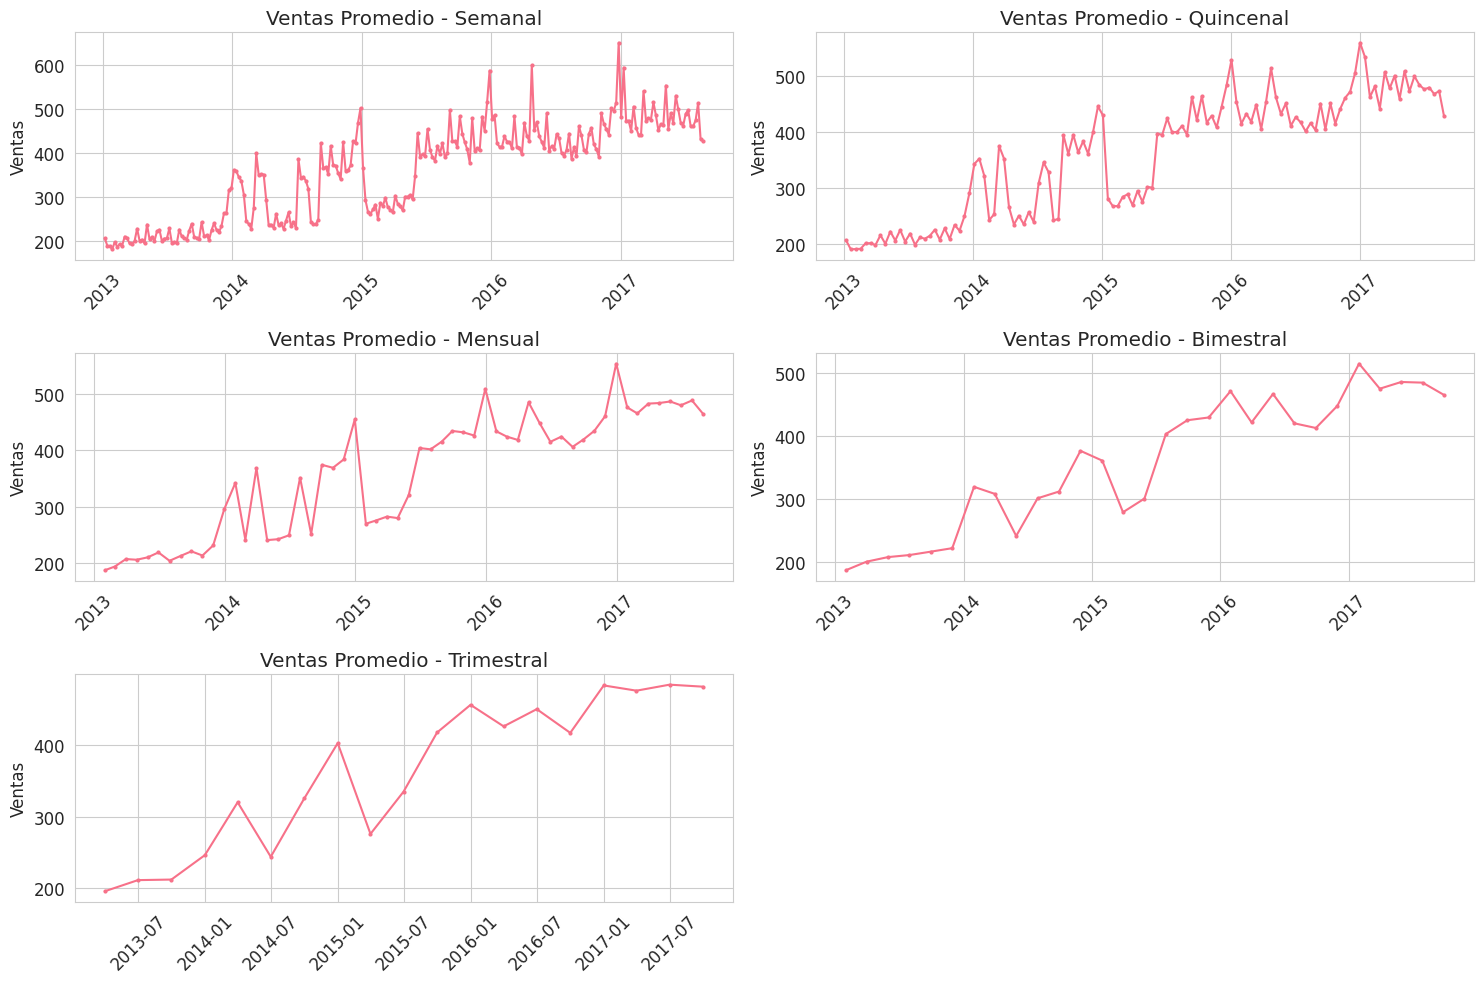


Shape del DataFrame: (468, 3)


In [80]:
# en el semanal y quincenal se pueden ver subidas y bajadas en algunos casos que se podrian
# asociar al cobro quincenal del sueldo , mejor dicho los dias 15 y ultimo dia del mes
# en los primeros meses se ve que los primeros dias de cada mes es la semana que mas gasta
#  2013-01-06         206.8435
#  2013-01-13         190.2852
#  2013-02-03         198.5643
#  2013-02-10         187.7882
#  2013-03-03         210.8891
#  2013-03-10         206.5403

# Crear diferentes agregaciones temporales
agregaciones = {
   'Semanal': df_consolidated.groupby(pd.Grouper(key='date', freq='W'))['sales'].mean(),
   'Quincenal': df_consolidated.groupby(pd.Grouper(key='date', freq='2W'))['sales'].mean(),
   'Mensual': df_consolidated.groupby(pd.Grouper(key='date', freq='M'))['sales'].mean(),
   'Bimestral': df_consolidated.groupby(pd.Grouper(key='date', freq='2M'))['sales'].mean(),
   'Trimestral': df_consolidated.groupby(pd.Grouper(key='date', freq='Q'))['sales'].mean()
}

# Crear DataFrame consolidado
df_agregaciones = pd.DataFrame()
for periodo, datos in agregaciones.items():
   temp_df = datos.reset_index()
   temp_df.columns = ['fecha', 'ventas_promedio']
   temp_df['periodo'] = periodo
   df_agregaciones = pd.concat([df_agregaciones, temp_df], ignore_index=True)

print("Primeras filas del DataFrame de agregaciones:")
print(df_agregaciones.head(20))

# Gráfico comparativo
plt.figure(figsize=(15, 10))
for i, periodo in enumerate(['Semanal', 'Quincenal', 'Mensual', 'Bimestral', 'Trimestral'], 1):
   plt.subplot(3, 2, i)
   data = df_agregaciones[df_agregaciones['periodo'] == periodo]
   plt.plot(data['fecha'], data['ventas_promedio'], marker='o', markersize=2)
   plt.title(f'Ventas Promedio - {periodo}')
   plt.xticks(rotation=45)
   plt.ylabel('Ventas')

plt.tight_layout()
plt.show()

print(f"\nShape del DataFrame: {df_agregaciones.shape}")

In [81]:
df_consolidated['año_mes'] = df_consolidated['date'].dt.to_period('M').astype(str)

enero_2013 = df_consolidated[df_consolidated['año_mes'] == '2013-01']['sales']

print("ANÁLISIS DETALLADO - ENERO 2013")
print("="*40)
print(f"Total de registros: {len(enero_2013):,}")
print(f"Registros con ventas = 0: {(enero_2013 == 0).sum():,}")
print(f"Registros con ventas > 0: {(enero_2013 > 0).sum():,}")
print(f"Porcentaje sin ventas: {((enero_2013 == 0).sum() / len(enero_2013)) * 100:.1f}%")
print(f"Porcentaje con ventas: {((enero_2013 > 0).sum() / len(enero_2013)) * 100:.1f}%")

print(f"\nEstadísticas de registros CON ventas (>0):")
ventas_positivas = enero_2013[enero_2013 > 0]
print(f"Cantidad: {len(ventas_positivas):,}")
print(f"Mínimo: {ventas_positivas.min():.2f}")
print(f"Máximo: {ventas_positivas.max():.2f}")
print(f"Promedio: {ventas_positivas.mean():.2f}")
print(f"Mediana: {ventas_positivas.median():.2f}")

print(f"\nDistribución de valores:")
print(f"Ventas = 0: {(enero_2013 == 0).sum():,}")
print(f"Ventas 0-10: {((enero_2013 > 0) & (enero_2013 <= 10)).sum():,}")
print(f"Ventas 10-50: {((enero_2013 > 10) & (enero_2013 <= 50)).sum():,}")
print(f"Ventas 50-100: {((enero_2013 > 50) & (enero_2013 <= 100)).sum():,}")
print(f"Ventas >100: {(enero_2013 > 100).sum():,}")

ANÁLISIS DETALLADO - ENERO 2013
Total de registros: 55,242
Registros con ventas = 0: 29,760
Registros con ventas > 0: 25,482
Porcentaje sin ventas: 53.9%
Porcentaje con ventas: 46.1%

Estadísticas de registros CON ventas (>0):
Cantidad: 25,482
Mínimo: 1.00
Máximo: 19849.00
Promedio: 405.29
Mediana: 101.00

Distribución de valores:
Ventas = 0: 29,760
Ventas 0-10: 5,745
Ventas 10-50: 4,297
Ventas 50-100: 2,665
Ventas >100: 12,775


In [82]:

# Generar periodos mensuales desde enero 2013 hasta agosto 2017
periodos_mes = pd.period_range(start='2013-01', end='2017-08', freq='M').astype(str).tolist()

# Crear tabla completa con análisis detallado para todos los meses
resultados_detallados = []

for periodo in periodos_mes:
   data = df_consolidated[df_consolidated['año_mes'] == periodo]['sales']
   
   # Estadísticas básicas
   total_registros = len(data)
   ventas_cero = (data == 0).sum()
   ventas_positivas = (data > 0).sum()
   
   # Estadísticas de ventas positivas
   ventas_pos_data = data[data > 0]
   
   # Distribución por rangos
   rango_0_10 = ((data > 0) & (data <= 10)).sum()
   rango_10_50 = ((data > 10) & (data <= 50)).sum()
   rango_50_100 = ((data > 50) & (data <= 100)).sum()
   rango_mas_100 = (data > 100).sum()
   
   resultados_detallados.append({
       'periodo': str(periodo),
       'total_registros': total_registros,
       'ventas_cero': ventas_cero,
       'ventas_positivas': ventas_positivas,
       'pct_sin_ventas': (ventas_cero / total_registros) * 100,
       'pct_con_ventas': (ventas_positivas / total_registros) * 100,
       'promedio_positivas': ventas_pos_data.mean() if len(ventas_pos_data) > 0 else 0,
       'mediana_positivas': ventas_pos_data.median() if len(ventas_pos_data) > 0 else 0,
       'max_ventas': ventas_pos_data.max() if len(ventas_pos_data) > 0 else 0,
       'rango_0_10': rango_0_10,
       'rango_10_50': rango_10_50,
       'rango_50_100': rango_50_100,
       'rango_mas_100': rango_mas_100
   })

# Convertir a DataFrame
df_analisis_completo = pd.DataFrame(resultados_detallados)

# Mostrar tabla completa
print("ANÁLISIS COMPLETO POR MES - DISTRIBUCIÓN DE VENTAS")
print("="*80)

# Tabla principal
print(df_analisis_completo[['periodo', 'total_registros', 'ventas_cero', 'ventas_positivas', 
                          'pct_sin_ventas', 'pct_con_ventas']].round(1).to_string(index=False))

print("\n" + "="*80)
print("ESTADÍSTICAS DE VENTAS POSITIVAS")
print("="*80)
print(df_analisis_completo[['periodo', 'promedio_positivas', 'mediana_positivas', 
                          'max_ventas']].round(2).to_string(index=False))

print("\n" + "="*80)
print("DISTRIBUCIÓN POR RANGOS")
print("="*80)
print(df_analisis_completo[['periodo', 'rango_0_10', 'rango_10_50', 'rango_50_100', 
                          'rango_mas_100']].to_string(index=False))


ANÁLISIS COMPLETO POR MES - DISTRIBUCIÓN DE VENTAS
periodo  total_registros  ventas_cero  ventas_positivas  pct_sin_ventas  pct_con_ventas
2013-01            55242        29760             25482         53.9000         46.1000
2013-02            49896        26088             23808         52.3000         47.7000
2013-03            55242        28089             27153         50.8000         49.2000
2013-04            53460        26858             26602         50.2000         49.8000
2013-05            55242        27359             27883         49.5000         50.5000
2013-06            53460        26396             27064         49.4000         50.6000
2013-07            55242        27970             27272         50.6000         49.4000
2013-08            55242        27570             27672         49.9000         50.1000
2013-09            53460        26741             26719         50.0000         50.0000
2013-10            55242        27631             27611         50.00

In [83]:
# bastante modificador onpromotion

# Ver la distribución de onpromotion
print("Valores únicos en onpromotion (primeros 20):")
print(sorted(df_consolidated['onpromotion'].unique())[:20])
print(f"\nRango: {df_consolidated['onpromotion'].min()} a {df_consolidated['onpromotion'].max()}")

# ==========================================
# ANÁLISIS IMPACTO DE PROMOCIONES
# ==========================================

print("="*60)
print("ANÁLISIS IMPACTO PROMOCIONES POR AÑO_MES")
print("="*60)

# Crear variable binaria: tiene promociones o no
df_consolidated['tiene_promo'] = (df_consolidated['onpromotion'] > 0).astype(int)

# Análisis promociones (binario)
promo_analysis = df_consolidated.groupby(['año_mes', 'tiene_promo'])['sales'].agg([
    'mean', 'median', 'count', 'sum'
]).round(2).reset_index()

# Pivot para comparar mejor
promo_pivot = promo_analysis.pivot(index='año_mes', columns='tiene_promo', values='mean')
promo_pivot.columns = ['Sin_Promocion', 'Con_Promocion'] 
promo_pivot['Diferencia'] = promo_pivot['Con_Promocion'] - promo_pivot['Sin_Promocion']
promo_pivot['Ratio'] = (promo_pivot['Con_Promocion'] / promo_pivot['Sin_Promocion']).round(2)

print("VENTAS MEDIAS: Sin Promoción vs Con Promoción")
print(promo_pivot)

# ==========================================
# ANÁLISIS POR CANTIDAD DE PROMOCIONES
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS POR CANTIDAD DE PROMOCIONES")
print("="*60)

# Crear rangos de promociones
df_consolidated['rango_promo'] = pd.cut(df_consolidated['onpromotion'], 
                                       bins=[-1, 0, 5, 15, 50, float('inf')],
                                       labels=['0', '1-5', '6-15', '16-50', '50+'])

promo_cantidad = df_consolidated.groupby('rango_promo')['sales'].agg([
    'mean', 'median', 'count'
]).round(2)

print("VENTAS POR CANTIDAD DE PROMOCIONES:")
print(promo_cantidad)

# Estadísticas generales
print("\n" + "="*50)
print("RESUMEN GENERAL PROMOCIONES")
print("="*50)

sin_promo = df_consolidated[df_consolidated['onpromotion'] == 0]['sales']
con_promo = df_consolidated[df_consolidated['onpromotion'] > 0]['sales']

print(f"Sin promoción - Media: {sin_promo.mean():.2f}, Mediana: {sin_promo.median():.2f}")
print(f"Con promoción - Media: {con_promo.mean():.2f}, Mediana: {con_promo.median():.2f}")
print(f"Diferencia media: {con_promo.mean() - sin_promo.mean():.2f}")
print(f"Ratio (con/sin): {con_promo.mean() / sin_promo.mean():.2f}x")

# Correlación entre cantidad de promociones y ventas
correlacion = df_consolidated['onpromotion'].corr(df_consolidated['sales'])
print(f"\nCorrelación cantidad promociones vs ventas: {correlacion:.3f}")

Valores únicos en onpromotion (primeros 20):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Rango: 0 a 741
ANÁLISIS IMPACTO PROMOCIONES POR AÑO_MES
VENTAS MEDIAS: Sin Promoción vs Con Promoción
         Sin_Promocion  Con_Promocion  Diferencia   Ratio
año_mes                                                  
2013-01       186.9500            NaN         NaN     NaN
2013-02       193.5800            NaN         NaN     NaN
2013-03       206.8800            NaN         NaN     NaN
2013-04       205.6400            NaN         NaN     NaN
2013-05       209.9400            NaN         NaN     NaN
2013-06       218.6600            NaN         NaN     NaN
2013-07       203.7800            NaN         NaN     NaN
2013-08       212.4800            NaN         NaN     NaN
2013-09       220.5900            NaN         NaN     NaN
2013-10       213.1600            NaN         NaN     NaN
2013-11       231.1400            NaN         NaN     NaN
2013-12       295.6100     

In [84]:
# este para el periodo 2016-01-01 a 2017-08-15 train2 y test2

def preparar_features(df, fecha_terremoto='2016-04-16', filtro_desde='2016-01-01'):
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    # FILTRO POR FECHA (antes de eliminar la columna date)
    if filtro_desde:
        df = df[df['date'] >= filtro_desde]

    # Features temporales existentes
    df['día_semana'] = df['date'].dt.dayofweek
    df['día_mes'] = df['date'].dt.day
    df['mes'] = df['date'].dt.month
    df['año'] = df['date'].dt.year
    df['es_fin_semana'] = df['día_semana'].isin([5,6]).astype(int)
    
    # Feature del terremoto
    fecha_terremoto = pd.to_datetime(fecha_terremoto)
    fecha_60_dias = fecha_terremoto + pd.Timedelta(days=60)
    
    def asignar_terremoto(fecha):
        if fecha == fecha_terremoto:
            return 1  # Día del terremoto
        elif fecha_terremoto < fecha <= fecha_60_dias:
            return 2  # 60 días después del terremoto
        elif fecha > fecha_60_dias:
            return 3  # Días siguientes (después de 60 días)
        else:
            return 0  # Antes del terremoto
    
    df['terremoto_efecto'] = df['date'].apply(asignar_terremoto)
    
    return df

# 
train2 = preparar_features(train1, fecha_terremoto='2016-04-16',filtro_desde='2016-01-01')  
test2 = preparar_features(test1, fecha_terremoto='2016-04-16',filtro_desde='2016-01-01')   

# Verificar la distribución
print("Distribución efecto terremoto en train:")
print(train2['terremoto_efecto'].value_counts().sort_index())
print("\nDistribución efecto terremoto en test:")
print(test2['terremoto_efecto'].value_counts().sort_index())

Distribución efecto terremoto en train:
terremoto_efecto
0    188892
1      1782
2    106920
3    757350
Name: count, dtype: int64

Distribución efecto terremoto en test:
terremoto_efecto
3    28512
Name: count, dtype: int64


In [85]:
# este para todo el periodo
 
def preparar_features(df, fecha_terremoto='2016-04-16'):
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])

    # Features temporales existentes
    df['día_semana'] = df['date'].dt.dayofweek
    df['día_mes'] = df['date'].dt.day
    df['mes'] = df['date'].dt.month
    df['año'] = df['date'].dt.year
    df['es_fin_semana'] = df['día_semana'].isin([5,6]).astype(int)
    
    # Feature del terremoto
    fecha_terremoto = pd.to_datetime(fecha_terremoto)
    fecha_60_dias = fecha_terremoto + pd.Timedelta(days=60)
    
    def asignar_terremoto(fecha):
        if fecha == fecha_terremoto:
            return 1  # Día del terremoto
        elif fecha_terremoto < fecha <= fecha_60_dias:
            return 2  # 60 días después del terremoto
        elif fecha > fecha_60_dias:
            return 3  # Días siguientes (después de 60 días)
        else:
            return 0  # Antes del terremoto
    
    df['terremoto_efecto'] = df['date'].apply(asignar_terremoto)
    
    return df

# 
train1 = preparar_features(train1, fecha_terremoto='2016-04-16')  
test1 = preparar_features(test1, fecha_terremoto='2016-04-16')   

# Verificar la distribución
print("Distribución efecto terremoto en train:")
print(train1['terremoto_efecto'].value_counts().sort_index())
print("\nDistribución efecto terremoto en test:")
print(test1['terremoto_efecto'].value_counts().sort_index())


Distribución efecto terremoto en train:
terremoto_efecto
0    2134836
1       1782
2     106920
3     757350
Name: count, dtype: int64

Distribución efecto terremoto en test:
terremoto_efecto
3    28512
Name: count, dtype: int64


In [86]:
encoders = {}
categorical_cols = ['family', 'city', 'state', 'type_store']

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Fit con todas las categorías (train + test)
    all_values = pd.concat([train1[col], test1[col]]).astype(str)
    encoders[col].fit(all_values)
    
    # Aplicar encoding
    train1[col + '_encoded'] = encoders[col].transform(train1[col].astype(str))
    test1[col + '_encoded'] = encoders[col].transform(test1[col].astype(str))



encoders = {}
categorical_cols = ['family', 'city', 'state', 'type_store']

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Fit con todas las categorías (train + test)
    all_values = pd.concat([train2[col], test2[col]]).astype(str)
    encoders[col].fit(all_values)
    
    # Aplicar encoding
    train2[col + '_encoded'] = encoders[col].transform(train2[col].astype(str))
    test2[col + '_encoded'] = encoders[col].transform(test2[col].astype(str))

In [87]:
def crear_features_train(df):
    df = df.copy()
    df = df.sort_values(['store_nbr', 'family', 'date'])
    
    # Lags
    df['lag_1'] = df.groupby(['store_nbr', 'family'])['sales'].shift(1)
    df['lag_7'] = df.groupby(['store_nbr', 'family'])['sales'].shift(7)
    df['lag_15'] = df.groupby(['store_nbr', 'family'])['sales'].shift(15)
    
    # Rolling means
    df['mean_7d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7).mean())
    df['mean_15d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(15).mean())
    df['mean_30d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30).mean())
    
    return df

train1 = crear_features_train(train1)
train2 = crear_features_train(train2)

In [88]:
feature_cols = [
    'store_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
    'día_semana', 'día_mes', 'mes', 'año', 'es_fin_semana',
    'has_holiday', 'lag_1', 'lag_7', 'lag_15', 'mean_7d','mean_15d','mean_30d',
    'family_encoded', 'city_encoded', 'state_encoded', 'type_store_encoded','terremoto_efecto'
]

train_clean = train1.dropna(subset=feature_cols)
X_train = train_clean[feature_cols]
y_train = train_clean['sales']

train_clean2 = train2.dropna(subset=feature_cols)
X_recent = train_clean2[feature_cols]
y_recent = train_clean2['sales']

In [89]:
# Neural Network

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [91]:
#v1                 v1 en LB
#RMSLE: 2.655584    3.13920
#MAE: 80.62
#v2 voy a probar varios cambios con el mismo modelo cambiar parametros
# 3 dropout de 0.3/0.3/0.2 , los paso a 0.20/0.20/0.15
#RMSLE: 2.634508 solo cambio dropout me parece muy poco , pero dejo este para seguir
#MAE: 77.51
# learning rate es 0.001 lo paso a 0.03  # ambos
# batch 1024 a 512                       # ambos juntos por memoria
#
#RMSLE: 2.615728 es muy poca la mejora
#MAE: 77.43
#voy a hacer una prueba cambiando a MAE optimizar , lo demas igual
#
#RMSLE: 0.556216 hago submission de esto a ver como esta y tuvo early stop , mucha dif , 0.71015 en Leaderboard , muy bien
#MAE: 49.04 learning = 0.03 , dropout 0.2/0.2/0.15, batch = 512 , loss = MAE , epoch = 100 tuvo early stop

In [92]:
# =============================================================================
# 1. PREPARACIÓN DE DATOS PARA REDES NEURONALES
# =============================================================================

def preparar_datos_completo_nn(X_train, y_train, test_size=0.2, scaler_type='standard'):
    """
    Prepara datos completos para red neuronal: división + normalización
    """
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    print("Preparando datos completos para Red Neuronal...")
    
    # 1. Dividir datos
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, 
        test_size=test_size, 
        random_state=42
    )
    
    print(f"División completada - Train: {X_train_split.shape}, Val: {X_val.shape}")
    
    # 2. Escalado de features
    if scaler_type == 'standard':
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
    else:
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
    
    # 3. Ajustar y transformar X
    X_train_scaled = scaler_X.fit_transform(X_train_split)
    X_val_scaled = scaler_X.transform(X_val)
    
    # 4. Ajustar y transformar y
    y_train_scaled = scaler_y.fit_transform(y_train_split.values.reshape(-1, 1)).ravel()
    y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
    
    print(f"Datos escalados - Train: {X_train_scaled.shape}, Val: {X_val_scaled.shape}")
    
    return X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y

# Ejecutar preparación completa:
X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_X, scaler_y = preparar_datos_completo_nn(
    X_train, y_train  # 
)

Preparando datos completos para Red Neuronal...
División completada - Train: (2359368, 21), Val: (589842, 21)
Datos escalados - Train: (2359368, 21), Val: (589842, 21)


In [93]:
# =============================================================================
# 2. ARQUITECTURA DE RED NEURONAL
# =============================================================================

def crear_modelo_nn(input_dim, arquitectura='medium'):
    """
    Crea modelo de red neuronal para forecasting
    
    Arquitecturas:
    - 'simple': 2 capas, rápido
    - 'medium': 3 capas, balance velocidad/rendimiento  
    - 'complex': 4 capas, más poder pero más lento
    """
    
    model = Sequential()
    
    if arquitectura == 'simple':
        model.add(Dense(64, activation='relu', input_dim=input_dim))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        
    elif arquitectura == 'medium':
        model.add(Dense(128, activation='relu', input_dim=input_dim))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.15))
        
    else:  # complex
        model.add(Dense(256, activation='relu', input_dim=input_dim))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
    
    # Capa de salida
    model.add(Dense(1, activation='linear'))  # Para regresión
    
    return model

In [94]:
# =============================================================================
# 3. FUNCIÓN DE PÉRDIDA PERSONALIZADA PARA RMSLE
# =============================================================================

def rmsle_loss(y_true, y_pred):
    """
    Root Mean Squared Logarithmic Error como función de pérdida
    """
    # Asegurar valores positivos
    y_true = tf.maximum(y_true, 0.)
    y_pred = tf.maximum(y_pred, 0.)
    
    # Calcular RMSLE
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log1p(y_true) - tf.math.log1p(y_pred))))

def rmsle_metric(y_true, y_pred):
    """
    RMSLE como métrica para monitoreo
    """
    return rmsle_loss(y_true, y_pred)

In [102]:
# =============================================================================
# 4. ENTRENAMIENTO DEL MODELO
# =============================================================================
def entrenar_modelo_nn(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, 
                       epochs=1, batch_size=512, learning_rate=0.003):
    """
    Entrena modelo de red neuronal con datos YA escalados
    """
    
    print(f"Datos recibidos - Train: {X_train_scaled.shape}, Val: {X_val_scaled.shape}")
    
    # Crear modelo
    model = crear_modelo_nn(X_train_scaled.shape[1])
    
    # Compilar modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mae',  # Usar RMSLE como loss
        metrics=[rmsle_metric, 'mae']
    )
    
    print("Arquitectura del modelo:")
    model.summary()
    
    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=8,
            min_lr=1e-6,
            verbose=1
        )
    ]
    
    # Entrenar
    print(f"\nIniciando entrenamiento...")
    print(f"Epochs: {epochs}, Batch size: {batch_size}")
    
    history = model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_val_scaled, y_val_scaled),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history

# Ejecutar entrenamiento:
model, history = entrenar_modelo_nn(
    X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, epochs=1
)

Datos recibidos - Train: (2359368, 21), Val: (589842, 21)
Arquitectura del modelo:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 384 (1.50 KB)


Iniciando entrenamiento...
Epochs: 1, Batch size: 512
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.1080 - mae: 0.1080 - rmsle_metric: 0.4784 - val_loss: 0.0639 - val_mae: 0.0639 - val_rmsle_metric: 0.4615 - learning_rate: 0.0030
Restoring model weights from the end of the best epoch: 1.


In [103]:
model, history = entrenar_modelo_nn(
    X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, epochs=100
)

Datos recibidos - Train: (2359368, 21), Val: (589842, 21)
Arquitectura del modelo:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 384 (1.50 KB)


Iniciando entrenamiento...
Epochs: 100, Batch size: 512
Epoch 1/100
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1139 - mae: 0.1139 - rmsle_metric: 0.4763 - val_loss: 0.0557 - val_mae: 0.0557 - val_rmsle_metric: 0.4714 - learning_rate: 0.0030
Epoch 2/100
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0714 - mae: 0.0714 - rmsle_metric: 0.4769 - val_loss: 0.0546 - val_mae: 0.0546 - val_rmsle_metric: 0.4755 - learning_rate: 0.0030
Epoch 3/100
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0673 - mae: 0.0673 - rmsle_metric: 0.4782 - val_loss: 0.0520 - val_mae: 0.0520 - val_rmsle_metric: 0.4719 - learning_rate: 0.0030
Epoch 4/100
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0656 - mae: 0.0656 - rmsle_metric: 0.4780 - val_loss: 0.0547 - val_mae: 0.0547 - val_rmsle_metric: 0.4675 - learning_rate: 0.0030
Epoch 5/100
4609/4609 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0650 - mae: 0.0650 - rmsle_metric: 0.4791 - val_loss: 0.0620 - val_mae: 0.0620 - val_rmsle_me

In [97]:
#

NameError: name 'ds111' is not defined

In [108]:
# =============================================================================
# 5. EVALUACIÓN Y VISUALIZACIÓN
# =============================================================================

def evaluar_modelo_nn(model, X_val, y_val, scaler_X, scaler_y):
    """
    Evalúa el modelo y calcula métricas
    """
    from sklearn.metrics import mean_squared_log_error, mean_absolute_error
    
    # Escalar datos de validación
    X_val_scaled = scaler_X.transform(X_val)
    
    # Predecir
    y_pred_scaled = model.predict(X_val_scaled).ravel()
    
    # Desescalar predicciones
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = np.maximum(y_pred, 0)  # Asegurar valores positivos
    
    # Calcular métricas
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    
    print(f"\nMétricas de evaluación:")
    print(f"RMSLE: {rmsle:.6f}")
    print(f"MAE: {mae:.2f}")
    
    return y_pred, rmsle

def plot_training_history(history):
    """
    Visualiza el entrenamiento
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_title('Model Loss (RMSLE)')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # MAE
    ax2.plot(history.history['mae'], label='Train MAE')
    ax2.plot(history.history['val_mae'], label='Val MAE')
    ax2.set_title('Mean Absolute Error')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


In [109]:
# =============================================================================
# 6. PREDICCIÓN PARA ROLLING FORECAST (INTEGRACIÓN CON TU CÓDIGO)
# =============================================================================

class NeuralNetworkWrapper:
    """
    Wrapper para usar la red neuronal en tu función rolling_prediction_15_dias
    """
    
    def __init__(self, model, scaler_X, scaler_y):
        self.model = model
        self.scaler_X = scaler_X
        self.scaler_y = scaler_y
    
    def predict(self, X):
        """
        Función predict compatible con tu código existente
        """
        # Escalar features
        X_scaled = self.scaler_X.transform(X)
        
        # Predecir
        y_pred_scaled = self.model.predict(X_scaled, verbose=0).ravel()
        
        # Desescalar
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        # Asegurar valores positivos
        return np.maximum(y_pred, 0)

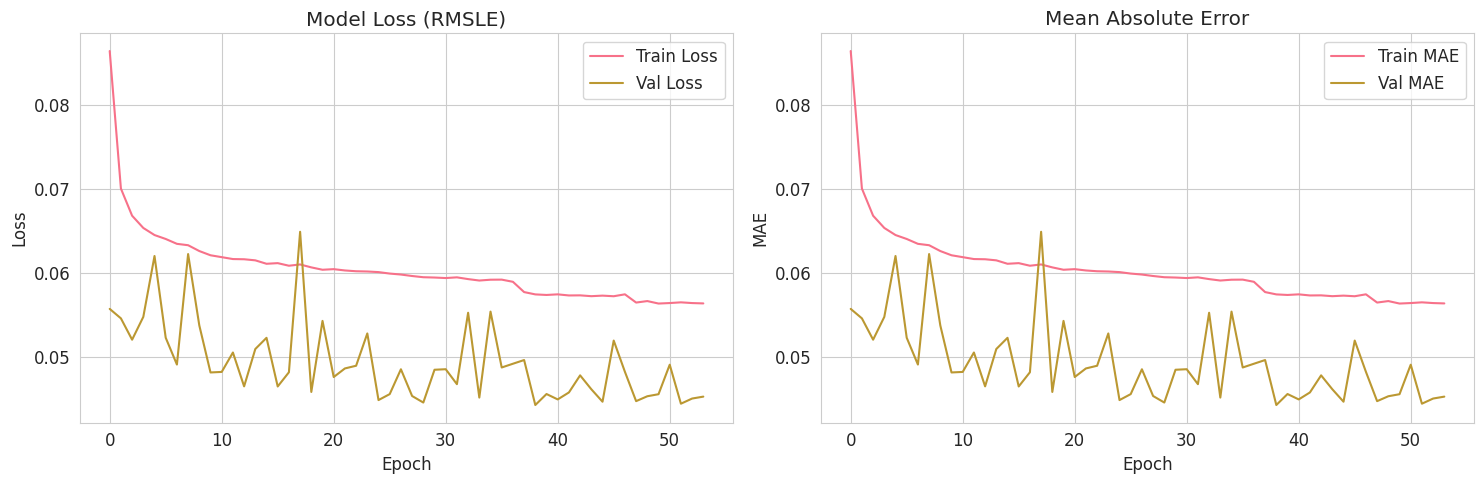

In [110]:
# Visualizar entrenamiento
plot_training_history(history)

In [107]:
# Evaluar
_, X_val_eval, _, y_val_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_pred, rmsle = evaluar_modelo_nn(model, X_val_eval, y_val_eval, scaler_X, scaler_y)

18433/18433 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step

Métricas de evaluación:
RMSLE: 0.556216
MAE: 49.04


In [ ]:
# Crear wrapper para usar en rolling_prediction_15_dias
nn_wrapper = NeuralNetworkWrapper(model, scaler_X, scaler_y)

In [ ]:
###############

In [ ]:
def rolling_prediction_15_dias(model, train_data, test_data, feature_cols):
    # Dataset extendido con últimos 31 días de train
    fecha_inicio_test = test_data['date'].min()
    fecha_corte = fecha_inicio_test - pd.Timedelta(days=31)
    
    train_contexto = train_data[train_data['date'] >= fecha_corte].copy()
    test_sin_sales = test_data.drop('sales', axis=1, errors='ignore')
    df_extended = pd.concat([train_contexto, test_sin_sales])
    df_extended = df_extended.sort_values(['store_nbr', 'family', 'date']).reset_index(drop=True)
    
    predicciones_finales = []
    fechas_test = sorted(test_data['date'].unique())
    
    for día_idx, fecha_pred in enumerate(fechas_test):
        print(f"Día {día_idx + 1}/15: {fecha_pred}")
        
        mask_día = df_extended['date'] == fecha_pred
        df_día = df_extended[mask_día].copy()
        
        # Calcular lags dinámicamente
        for idx in df_día.index:
            store = df_día.loc[idx, 'store_nbr']
            family = df_día.loc[idx, 'family']
            
            serie_mask = (
                (df_extended['store_nbr'] == store) & 
                (df_extended['family'] == family) & 
                (df_extended['date'] < fecha_pred)
            )
            serie_histórica = df_extended[serie_mask].sort_values('date')
            
            # Lags
            if len(serie_histórica) >= 1:
                df_día.loc[idx, 'lag_1'] = serie_histórica['sales'].iloc[-1]
            if len(serie_histórica) >= 7:
                df_día.loc[idx, 'lag_7'] = serie_histórica['sales'].iloc[-7]
            if len(serie_histórica) >= 15:
                df_día.loc[idx, 'lag_15'] = serie_histórica['sales'].iloc[-15]
            
            # Rolling means
            if len(serie_histórica) >= 7:
                df_día.loc[idx, 'mean_7d'] = serie_histórica['sales'].tail(7).mean()
            if len(serie_histórica) >= 15:
                df_día.loc[idx, 'mean_15d'] = serie_histórica['sales'].tail(15).mean()
            if len(serie_histórica) >= 30:
                df_día.loc[idx, 'mean_30d'] = serie_histórica['sales'].tail(30).mean()
        
        # Rellenar NaN y predecir
        df_día[feature_cols] = df_día[feature_cols].fillna(0)
        predicciones = model.predict(df_día[feature_cols])
        predicciones = np.maximum(predicciones, 0)
        
        # Actualizar dataset con predicciones
        df_día['sales'] = predicciones
        df_extended.loc[mask_día, 'sales'] = predicciones
        
        predicciones_finales.append(df_día[['id', 'sales']])
    
    return pd.concat(predicciones_finales, ignore_index=True)

In [ ]:
#pred_nn = rolling_prediction_15_dias(nn_wrapper, train_data, test_data, feature_cols)

In [ ]:
#

In [ ]:
submission = rolling_prediction_15_dias(nn_wrapper, train2, test2, feature_cols)
submission = submission.sort_values('id')
submission.to_csv('submission.csv', index=False)

print(f"Submission shape: {submission.shape}")
print(submission['sales'].describe())


In [ ]:
submission.head()